In [1]:
# base
import matplotlib.pyplot as plt
import json
from const import *
plt.rc('font', family='Times New Roman')
def read_json(file_path):
    with open(file_path, "r") as f:
        data = json.load(f)
    return data
def double(lis):
    res = []
    for tmp in lis:
        res.append(tmp)
        res.append(tmp)
    return res


In [2]:
# # plt small datasets' accu
# dataset = CAR
# path_template = "result/small/mlp_{}_{}_debug.json"
# for opt in [ADAM, DSA, HD, SGD, MOMENTUM]:
#     data = read_json(path_template.format(dataset, opt))[ACCU]
#     if opt == DSA:
#         data = double(data)
#     x = [i + 1 for i in range(len(data))]
#     label = opt
#     if opt == DSA:
#         label = "$DSA$"
#     plt.plot(x,data,label=label)
# plt.legend()
# plt.show()

In [3]:
# # resnet+hd+mnist: overfit
# file_path = "result/large/resnet_MNIST_hypergradient_debug_1.json"
# data = read_json(file_path)
# train_loss = data[TRAINLOSS]
# val_loss = data[VALLOSS]
# accu = data[ACCU]
# epochs = [i + 1 for i in range(len(train_loss))]

# fig, axs = plt.subplots()
# plt.grid()
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# # plt.plot(epochs,accu)
# # plt.scatter(epochs, train_loss, c=epochs, cmap="hot", label="Train loss", s=2)
# plots = []
# plots.append(plt.plot(epochs, train_loss, c="b", label="Train loss"))
# plots.append(plt.plot(epochs, val_loss, c="r", label="Validation loss"))
# # plt.legend(fontsize=10)
# plt.twinx()
# plots.append(plt.plot(epochs, accu, c="g", label="Test accuracy"))
# fig.legend(fontsize=10, loc=(120/200, 1/2))

# plt.show()

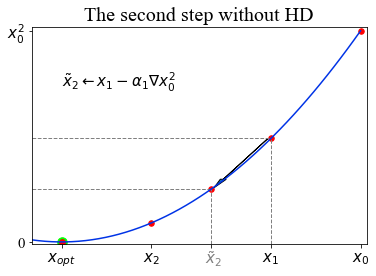

In [5]:
# # plot hd fit x^2
# import numpy as np
# fig, ax = plt.subplots()
# dot_size = 30
# tick_size = 15
# text_size = 15
# title_size = 20
# # base line & opt point
# x = np.linspace(-1, 10, 50)
# y = x ** 2
# plt.scatter(0,0, c='#00ff00', s=dot_size*3)
# plt.scatter(0,0, c='r', s=dot_size)
# plt.plot(x,y,alpha=1,color=plt.cm.winter(0.2))
# plt.xlim((-1, 10+0.2))
# plt.ylim((-1, 100+2))
# # scatter
# x0 = 10
# x1 = 7
# x2 = 3
# x2_ = 5
# x_opt = 0
# x = np.array([x_opt, x0, x1, x2, x2_])
# y = x ** 2
# labels = ['$x_{opt}$', '$x_0$', '$x_1$', '$x_2$', '']
# plt.xticks(ticks=x, labels=labels, size=tick_size)
# plt.text(x[-1]-0.2, -10.5, '$\\tilde{x}_2$', alpha=0.5, size=tick_size)
# # # init state
# # plt.title("Initial state", size=title_size)
# # plt.text(x_opt, x0**2*2/3+7, '$\\arg\\min{x^2}$, start from $x_0$', size=text_size)
# # plt.scatter(x0, x0**2, c='r', s=dot_size)
# # plt.yticks([0, x0**2, x1**2, x2**2], [0, '$x_0^2$', '$x_1^2$', '$x_2^2$'], size=tick_size)
# # plt.hlines([x0**2, x1**2, x2**2],[-1, -1, -1], [x0, x1, x2],colors='gray',linestyles='--',linewidth=1)
# # plt.vlines([x0, x1, x2], [-1, -1, -1], [x0**2, x1**2, x2**2],
# #            colors='gray', linestyles='--', linewidth=1)
# # plt.savefig("/Users/chenbozhou/Desktop/近期投稿/TPAMI/image/hd_init.png",
# #             bbox_inches='tight', dpi=300)
# # begin step
# plt.scatter(x, y, c='r', s=dot_size)
# plt.yticks([0, x0**2], [0, '$x_0^2$'], size=text_size)

# # # first step
# # plt.title("")
# # plt.title("The first step", size=title_size)
# # plt.text(x_opt, x0**2*2/3+7,
# #          '$x_1 \\leftarrow x_0 - \\alpha_1\\nabla x_0^2$', size=text_size)
# # plt.arrow(x0-0.1, x0**2, x1-x0+0.2, x1**2-x0**2+0.7, head_width=0.2,
# #           head_length=4, length_includes_head=True)
# # plt.hlines([x0**2, x1**2,],[-1, -1,], [x0, x1,],colors='gray',linestyles='--',linewidth=1)
# # plt.vlines([x0, x1,], [-1, -1,], [x0**2, x1**2,],
# #            colors='gray', linestyles='--', linewidth=1)
# # plt.savefig("/Users/chenbozhou/Desktop/近期投稿/TPAMI/image/hd_firststep.png",
# #             bbox_inches='tight', dpi=300)
# # # second step with hd
# # plt.title("The second step with HD", size=title_size)
# # plt.text(x_opt, x0**2*2/3+7+10,
# #          '$x_2 \\leftarrow x_1 - \\alpha_2\\nabla x_0^2$', size=text_size)
# # plt.arrow(x1-0.1, x1**2, x2-x1+0.2, x2**2-x1**2+0.7, head_width=0.2,
# #           head_length=4, length_includes_head=True)
# # plt.text(x_opt, x0**2*2/3+7, '$\\alpha_2 \\leftarrow \\alpha_1 + \\beta\\ \\nabla x_0^2 \\cdot \\nabla x_1^2$', size=text_size)
# # plt.text(x_opt, x0**2*2/3, '$\\alpha_2 > \\alpha_1$', size=text_size)
# # plt.hlines([x1**2, x2**2],[ -1, -1], [x1, x2],colors='gray',linestyles='--',linewidth=1)
# # plt.vlines([x1, x2], [-1, -1], [x1**2, x2**2],
# #            colors='gray', linestyles='--', linewidth=1)
# # plt.savefig("/Users/chenbozhou/Desktop/近期投稿/TPAMI/image/hd_secondstep.png",
# #             bbox_inches='tight', dpi=300)
# # second step without hd
# # plt.title(" ~ $\\tilde{x}_2 \\leftarrow x_1 - \\alpha_1\\nabla x_0^2$")
# plt.title("The second step without HD", size=title_size)
# plt.text(x_opt, x0**2*2/3+7,
#          '$\\tilde{x}_2 \\leftarrow x_1 - \\alpha_1\\nabla x_0^2$', size=text_size)
# plt.arrow(x1-0.1, x1**2, x2_-x1+0.2, x2_**2-x1**2+0.7, head_width=0.2,
#           head_length=4, length_includes_head=True)
# plt.hlines([x1**2, x2_**2],[ -1, -1], [x1, x2_],colors='gray',linestyles='--',linewidth=1)
# plt.vlines([x1, x2_], [-1, -1], [x1**2, x2_**2],
#            colors='gray', linestyles='--', linewidth=1)
# plt.savefig("/Users/chenbozhou/Desktop/近期投稿/TPAMI/image/hd_secondstep_.png",
#             bbox_inches='tight', dpi=300)


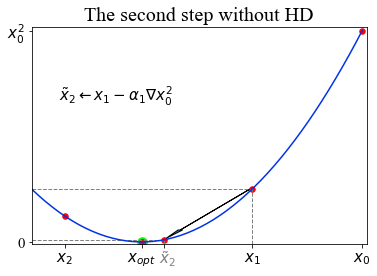

In [9]:
# # plot hd conflict example
# import numpy as np
# fig, ax = plt.subplots()
# dot_size = 30
# tick_size = 15
# text_size = 15
# title_size = 20
# x_lim_l = -5
# formula_pos = (x_lim_l + x_opt) / 4 * 3
# # base line & opt point
# x = np.linspace(x_lim_l, 10, 50)
# y = x ** 2
# plt.scatter(0, 0, c='#00ff00', s=dot_size*3)
# plt.scatter(0, 0, c='r', s=dot_size)
# plt.plot(x, y, alpha=1, color=plt.cm.winter(0.2))
# plt.xlim((x_lim_l, 10+0.2))
# plt.ylim((-1, 100+2))
# # scatter
# x0 = 10
# x1 = 5
# x2 = -3.5
# x2_ = 1
# x_opt = 0
# x = np.array([x_opt, x0, x1, x2, x2_])
# y = x ** 2
# labels = ['$x_{opt}$', '$x_0$', '$x_1$', '$x_2$', '']
# plt.xticks(ticks=x, labels=labels, size=tick_size)
# plt.text(x[-1]-0.2, -10.5, '$\\tilde{x}_2$', alpha=0.5, size=tick_size)
# # # init state
# # plt.title("Initial state", size=title_size)
# # plt.text(formula_pos, x0**2*2/3,
# #          '$\\arg\\min{x^2}$, start from $x_0$', size=text_size)
# # plt.scatter(x0, x0**2, c='r', s=dot_size)
# # plt.yticks([0, x0**2, x1**2, x2**2], [0, '$x_0^2$', '$x_1^2$', '$x_2^2$'], size=tick_size)
# # plt.hlines([x0**2, x1**2, x2**2], [x_lim_l for i in range(3)], [x0, x1, x2],
# #            colors='gray', linestyles='--', linewidth=1)
# # plt.vlines([x0, x1, x2], [-1 for i in range(3)], [x0**2, x1**2, x2**2],
# #            colors='gray', linestyles='--', linewidth=1)
# # plt.savefig("/Users/chenbozhou/Desktop/近期投稿/TPAMI/image/hd_conflict_init.png",
# #             bbox_inches='tight', dpi=300)
# # begin step
# plt.scatter(x, y, c='r', s=dot_size)
# plt.yticks([0, x0**2], [0, '$x_0^2$'], size=text_size)

# # # first step
# # plt.title("")
# # plt.title("The first step", size=title_size)
# # plt.text(formula_pos, x0**2*2/3,
# #          '$x_1 \\leftarrow x_0 - \\alpha_1\\nabla x_0^2$', size=text_size)
# # plt.arrow(x0-0.1, x0**2, x1-x0+0.2, x1**2-x0**2+0.7, head_width=0.2,
# #           head_length=4, length_includes_head=True)
# # plt.hlines([x0**2, x1**2, ], [x_lim_l for i in range(2)],
# #            [x0, x1, ], colors='gray', linestyles='--', linewidth=1)
# # plt.vlines([x0, x1, ], [-1 for i in range(2
# # )], [x0**2, x1**2, ],
# #            colors='gray', linestyles='--', linewidth=1)
# # plt.savefig("/Users/chenbozhou/Desktop/近期投稿/TPAMI/image/hd_conflict_firststep.png",
# #             bbox_inches='tight', dpi=300)
# # # second step with hd
# # plt.title("The second step with HD", size=title_size)
# # plt.text(formula_pos, x0**2*2/3+10,
# #          '$x_2 \\leftarrow x_1 - \\alpha_2\\nabla x_0^2$', size=text_size)
# # plt.arrow(x1-0.1, x1**2, x2-x1+0.2, x2**2-x1**2+0.7, head_width=1,
# #           head_length=1.5, length_includes_head=True)
# # plt.text(formula_pos, x0**2*2/3,
# #          '$\\alpha_2 \\leftarrow \\alpha_1 + \\beta\\ \\nabla x_0^2 \\cdot \\nabla x_1^2$', size=text_size)
# # plt.text(formula_pos, x0**2*2/3-7, '$\\alpha_2 > \\alpha_1$', size=text_size)
# # plt.hlines([x1**2, x2**2],[x_lim_l for i in range(2)], [x1, x2],colors='gray',linestyles='--',linewidth=1)
# # plt.vlines([x1, x2], [-1, -1], [x1**2, x2**2],
# #            colors='gray', linestyles='--', linewidth=1)
# # plt.savefig("/Users/chenbozhou/Desktop/近期投稿/TPAMI/image/hd_conflict_secondstep.png",
# #             bbox_inches='tight', dpi=300)
# # # second step without hd
# # # plt.title(" ~ $\\tilde{x}_2 \\leftarrow x_1 - \\alpha_1\\nabla x_0^2$")
# # plt.title("The second step without HD", size=title_size)
# # plt.text(formula_pos, x0**2*2/3,
# #          '$\\tilde{x}_2 \\leftarrow x_1 - \\alpha_1\\nabla x_0^2$', size=text_size)
# # plt.arrow(x1-0.1, x1**2, x2_-x1+0.2, x2_**2-x1**2+0.7, head_width=0.2,
# #           head_length=4, length_includes_head=True)
# # plt.hlines([x1**2, x2_**2], [x_lim_l for i in range(2)], [x1, x2_],
# #            colors='gray', linestyles='--', linewidth=1)
# # plt.vlines([x1, x2_], [-1, -1], [x1**2, x2_**2],
# #            colors='gray', linestyles='--', linewidth=1)
# # plt.savefig("/Users/chenbozhou/Desktop/近期投稿/TPAMI/image/hd_conflict_secondstep_.png",
# #             bbox_inches='tight', dpi=300)



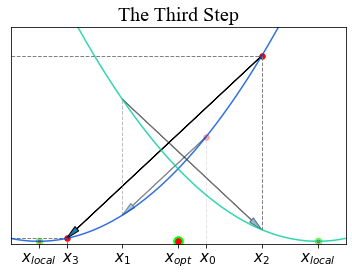

In [13]:
# # plot hd minibatch evidence
# import numpy as np
# fig, ax = plt.subplots()
# dot_size = 30
# tick_size = 15
# text_size = 15
# title_size = 20
# x_lim_l = 1.9
# x_lim_r = 3.1
# # base line & opt point
# x = np.linspace(x_lim_l, x_lim_r, 50)
# y1 = (x-2) ** 2
# y2 = (x-3) ** 2
# x_opt=2.5
# x_min1 = 2
# x_min2 = 3
# x0=2.6
# x1=2.3
# x2=2.8
# x3=2.1

# plt.scatter(x_opt, 0, c='#00ff00', s=dot_size*3)
# plt.scatter(x_opt, 0, c='r', s=dot_size)
# plt.scatter(x_min1, 0, c='#00ff00', s=dot_size*1.5, alpha=0.5)
# plt.scatter(x_min1, 0, c='r', s=dot_size*0.3, alpha=0.5)
# plt.scatter(x_min2, 0, c='#00ff00', s=dot_size*1.5, alpha=0.5)
# plt.scatter(x_min2, 0, c='r', s=dot_size*0.3, alpha=0.5)
# handles = []
# cmap='plt.cm.{}'.format('winter')
# handles.append(plt.plot(x, y1, alpha=0.8, color=eval(cmap)(0.3)))
# handles.append(plt.plot(x, y2, alpha=0.8, color=eval(cmap)(0.8)))
# plt.xlim((x_lim_l, x_lim_r))
# plt.ylim((-0.01, (2-x2)**2+0.1))

# def plt_init():
#     plt.title("Initial State", size=title_size)
#     plt.ylim((-0.01,(2-x_lim_r)**2 + 0.01))
#     plt.vlines(x0, -0.01, (2-x0)**2, colors='gray', linestyles='--', linewidth=1)
#     plt.hlines((2-x0)**2, x_lim_l, x0, colors='gray', linestyles='--', linewidth=1)
#     plt.scatter(x0, (2-x0)**2, c='r', s=dot_size)
#     plt.xticks(ticks=[x_min1, x_opt, x_min2, x0], labels=['$x_{local}$','$x_{opt}$','$\\ \\ x_{local}$', '$x_0$'], size=tick_size)
#     # plt.yticks([0, (2-x0)**2], [0, "$(2-x_0)^2$"],
#             #    size=tick_size, rotation=90, va="center")
#     plt.yticks([])
#     plt.legend(handles, labels=["$(2 - x)^2$", "$(3 - x)^2$"], fontsize=text_size, ncol=2)
#     plt.savefig("/Users/chenbozhou/Desktop/近期投稿/TPAMI/image/hd_mini_init.png",
#                 bbox_inches='tight', dpi=300)
#     return
# def plt_first():
#     plt.title("The First Step", size=title_size)
#     plt.vlines(x0, -0.01, (2-x0)**2, colors='gray', linestyles='--', linewidth=1)
#     plt.hlines((2-x0)**2, x_lim_l, x0, colors='gray', linestyles='--', linewidth=1)
#     plt.scatter(x0, (2-x0)**2, c='r', s=dot_size)
#     plt.vlines(x1, -0.01, (2-x1)**2, colors='gray', linestyles='--', linewidth=1)
#     plt.hlines((2-x1)**2, x_lim_l, x1, colors='gray', linestyles='--', linewidth=1)
#     plt.scatter(x1, (2-x1)**2, c='r', s=dot_size)
#     plt.arrow(x0, (2 - x0)**2, x1-x0, (2-x1)**2-(2-x0)**2, head_width=0.02,
#               head_length=0.05, length_includes_head=True)
#     plt.xticks(ticks=[x_min1, x_opt, x_min2, x0, x1], labels=['$x_{local}$','$x_{opt}$','$\\ \\ x_{local}$', '$x_0$', '$x_1$'], size=tick_size)
#     plt.yticks([], [])
#     plt.savefig("/Users/chenbozhou/Desktop/近期投稿/TPAMI/image/hd_mini_firststep.png",
#                 bbox_inches='tight', dpi=300)
#     return
# def plt_second():
#     plt.title("The Second Step", size=title_size)
#     plt.vlines(x1, (2-x1)**2, (3-x1)**2, colors='gray', linestyles='--', linewidth=1)
#     plt.hlines((3-x1)**2, x1, x_lim_r, colors='gray', linestyles='--', linewidth=1)
#     plt.scatter(x1, (3-x1)**2, c='r', s=dot_size)
#     plt.vlines(x2, -0.01, (3-x2)**2, colors='gray', linestyles='--', linewidth=1)
#     plt.hlines((3-x2)**2, x2, x_lim_r, colors='gray', linestyles='--', linewidth=1)
#     plt.scatter(x2, (3-x2)**2, c='r', s=dot_size)
#     plt.arrow(x1, (3 - x1)**2, x2-x1, (3-x2)**2-(3-x1)**2, head_width=0.02,
#             head_length=0.05, length_includes_head=True)

#     plt.vlines(x0, -0.01, (2-x0)**2, colors='gray',
#                linestyles='--', linewidth=1, alpha=0.5)
#     plt.scatter(x0, (2-x0)**2, c='r', s=dot_size, alpha=0.3)
#     plt.arrow(x0, (2 - x0)**2, x1-x0, (2-x1)**2-(2-x0)**2, head_width=0.02,
#               head_length=0.05, length_includes_head=True, alpha=0.4)
#     plt.xticks(ticks=[x_min1, x_opt, x_min2, x0, x1, x2], labels=['$x_{local}$','$x_{opt}$','$\\ \\ x_{local}$', '$x_0$', '$x_1$', '$x_2$'], size=tick_size)
#     plt.yticks([], [])
#     plt.savefig("/Users/chenbozhou/Desktop/近期投稿/TPAMI/image/hd_mini_secondstep.png",
#                 bbox_inches='tight', dpi=300)
#     return
# def plt_third():
#     plt.title("The Third Step", size=title_size)
#     plt.vlines(x2, (3-x2)**2, (2-x2)**2, colors='gray',
#                linestyles='--', linewidth=1)
#     plt.hlines((2-x2)**2, x_lim_l, x2, colors='gray',
#                linestyles='--', linewidth=1)
#     plt.scatter(x2, (2-x2)**2, c='r', s=dot_size)
#     plt.vlines(x3, -0.01, (2-x3)**2, colors='gray',
#                linestyles='--', linewidth=1)
#     plt.hlines((2-x3)**2, x_lim_l, x3, colors='gray',
#                linestyles='--', linewidth=1)
#     plt.scatter(x3, (2-x3)**2, c='r', s=dot_size)
#     plt.arrow(x2, (2 - x2)**2, x3-x2, (2-x3)**2-(2-x2)**2, head_width=0.02,
#               head_length=0.05, length_includes_head=True)

#     plt.vlines(x0, -0.01, (2-x0)**2, colors='gray',
#                linestyles='--', linewidth=1, alpha=0.2)
#     plt.scatter(x0, (2-x0)**2, c='r', s=dot_size, alpha=0.3)
#     plt.arrow(x0, (2 - x0)**2, x1-x0, (2-x1)**2-(2-x0)**2, head_width=0.02,
#               head_length=0.05, length_includes_head=True, alpha=0.4)
#     plt.vlines(x1, (2-x1)**2, (3-x1)**2, colors='gray', linestyles='--', linewidth=1, alpha=0.5)
#     plt.arrow(x1, (3 - x1)**2, x2-x1, (3-x2)**2-(3-x1)**2, head_width=0.02,
#               head_length=0.05, length_includes_head=True, alpha=0.5)
#     plt.xticks(ticks=[x_min1, x_opt, x_min2, x0, x1, x2, x3], labels=[
#                '$x_{local}\\ \\ $', '$x_{opt}$', '$x_{local}$', '$\\ x_0$', '$x_1$', '$x_2$', '$\\ \\ x_3$'], size=tick_size)
#     plt.yticks([], [])
#     plt.savefig("/Users/chenbozhou/Desktop/近期投稿/TPAMI/image/hd_mini_thirdstep.png",
#                 bbox_inches='tight', dpi=300)
#     return

# # plt_init()
# # plt_first()
# # plt_second()
# plt_third()


In [15]:
def cal_conflict(path):
    with open(path, 'r') as f:
        data = json.load(f)
    conflict = data[CONFLICT]
    sum(conflict)/len(conflict)


def get_data(models=[SGD, HD], dataset=MNIST, mode=TRAINLOSS):
    res = {}
    for model in models:
        path = "result/{}/{}".format("large",
                                     "resnet_{}_{}_debug.json".format(dataset, model))
        with open(path, 'r') as f:
            data = json.load(f)
        res[model] = data[mode]
    return res


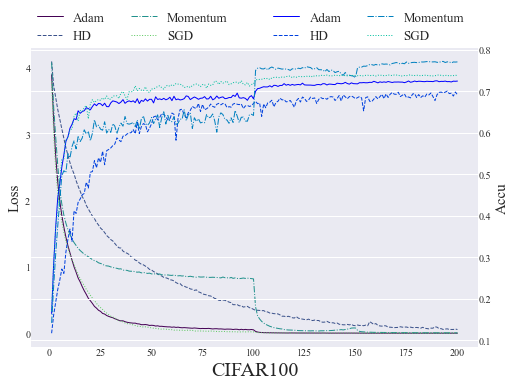

In [20]:
import matplotlib as mpl
mpl.style.use("seaborn")
plt.rc('font', family='Times New Roman')
dot_size = 30
tick_size = 15
text_size = 15
title_size = 20
legend_size = 13
pad_size = 1
# plot the loss and accu
opts = [ADAM, HD, MOMENTUM, SGD]
dataset = CIFAR100
dataset2label = {CIFAR10:"CIFAR10",CIFAR100:"CIFAR100",MNIST:"MNIST",SVHN:"SVHN"}

linestyle_candidate = ["-", "--", "-.", ':', 'solid', 'dashed', 'dashdot', 'dotted']
linestyle = {}
index = 4
for opt in opts:
    linestyle[opt] = linestyle_candidate[index]
    index += 1

accu = get_data(models=opts,dataset=dataset, mode=ACCU)
trainloss = get_data(models=opts, dataset=dataset, mode=TRAINLOSS)
epochs = [i + 1 for i in range(len(accu[HD]))]

fig, axs = plt.subplots()
plt.grid()
plt.xlabel(dataset2label[dataset],size=title_size)
# plt.xlim([500,len(accu[HD])])
# plot train loss
plt.ylabel("Loss", size=text_size)
plots = []
for i, opt in enumerate(opts):
    plots.append(plt.plot(
        epochs, trainloss[opt], c=plt.cm.viridis(i/len(opts)), label=OPTIMIZERS2LABEL[opt], linestyle=linestyle[opt], linewidth=1))
    # plots.append(plt.scatter(
    #     epochs, trainloss[opt], c=trainloss[opt], label=opt, marker=".", linewidth=1))
plt.legend(fontsize=legend_size, loc=(0, 1), ncol=2)
plt.tick_params(pad=pad_size)
plt.twinx()
plt.ylabel("Accu", size=text_size)
for i, opt in enumerate(opts):
    plots.append(
        plt.plot(epochs, accu[opt], c=plt.cm.winter(i/len(opts)), label=OPTIMIZERS2LABEL[opt], linestyle=linestyle[opt], linewidth=1))
        # plt.plot(epochs, accu[opt], c=plt.cm.plasma(i/len(opts)), label=opt, linestyle=linestyle[opt], linewidth=1))
plt.legend(fontsize=legend_size, loc=(0.53, 1), ncol = 2)
plt.tick_params(pad=pad_size)
# plt.show()
plt.savefig("/Users/chenbozhou/Desktop/近期投稿/TPAMI/image/hd_loss_{}.png".format(dataset2label[dataset].lower()),
            bbox_inches='tight', dpi=300)



In [9]:
# # generate latex table data
# def get_metrics(model=MLP, dataset=IRIS, opt=SGD):
#     dataset_type = 'small'
#     if dataset in LARGE:
#         dataset_type = 'large'
#     path = "result/{}/{}".format(dataset_type, "{}_{}_{}_debug.json".format(model, dataset, opt))
#     with open(path, 'r') as f:
#         data = json.load(f)
#     top = 100
#     index = data[ACCU].index(max(data[ACCU][:top]))
#     res = "& {} & {}$\sim${} & {}$\sim${} & {}$\sim${} \\\\".format(
#         round(data[ACCU][:top][index] * 100, 2),
#         round(min(data[F1SCORE][:top][index]) * 100,
#               2), round(max(data[F1SCORE][:top][index]) * 100, 2),
#         round(min(data[RECALL][:top][index]) * 100,
#               2), round(max(data[RECALL][:top][index]) * 100, 2),
#         round(min(data[PRECISION][:top][index]) * 100, 2), round(max(data[PRECISION][:top][index]) * 100, 2))
#     return res

# # dataset = WINE
# # dataset = CAR
# # dataset = IRIS
# dataset = AGARICUS
# for opt in [SGD, MOMENTUM, RMSPROP,
#         ADADELTA, ADAGRAD, ADAM,
#         ADAMW, ADAMAX, HD, DSA]:
#     print(OPTIMIZERS2LABEL[opt], get_metrics(dataset=dataset,opt=opt))


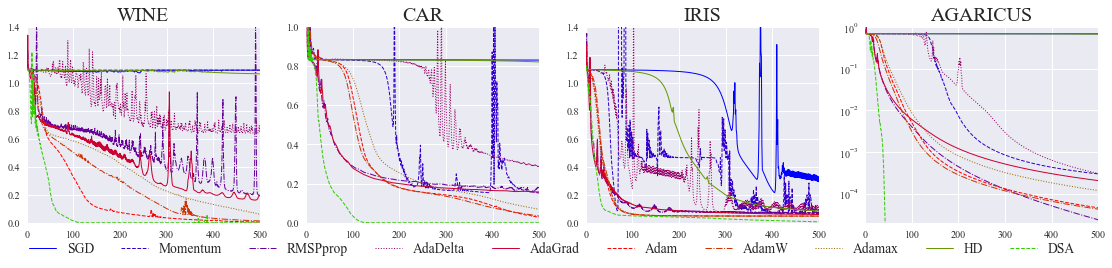

In [136]:
# # plt accu of feature datasets
# def get_data(models=[], dataset=IRIS, mode=TRAINLOSS):
#     res = {}
#     for model in models:
#         path = "result/{}/{}".format("small",
#                                      "mlp_{}_{}_debug.json".format(dataset, model))
#         with open(path, 'r') as f:
#             data = json.load(f)
#         res[model] = data[mode][:500]
#     return res

# import matplotlib as mpl
# mpl.style.use("seaborn")
# plt.rc('font', family='Times New Roman')
# dot_size = 30
# tick_size = 15
# text_size = 15
# title_size = 20
# legend_size = 13
# pad_size = 1
# opts = [SGD, MOMENTUM, RMSPROP,
#         ADADELTA, ADAGRAD, ADAM,
#         ADAMW, ADAMAX, HD, DSA]
# dataset = IRIS
# dataset2label = {IRIS:"IRIS",WINE:"WINE",CAR:"CAR",AGARICUS:"AGARICUS"}

# linestyle_candidate = ["-", "--", "-.", ':', 'solid', 'dashed', 'dashdot', 'dotted']
# linestyle = {}
# index = 0
# for opt in opts:
#     try:
#         linestyle[opt] = linestyle_candidate[index]
#     except:
#         index = 0
#         linestyle[opt] = linestyle_candidate[index]
#     index += 1

# figsize_base = 3
# fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(
#     6.4*figsize_base, 4.8/4*figsize_base))
# legend = False
# for i, dataset in enumerate(SMALL):
#     # accu = get_data(models=opts,dataset=dataset, mode=ACCU)
#     data = get_data(models=opts, dataset=dataset, mode=ACCU)
#     epochs = [i + 1 for i in range(len(data[HD]))]
#     plt.subplot(1,4,i+1)
#     plt.title(dataset2label[dataset], size=title_size)
#     plt.xlim([0,500])
#     plt.ylim(-0, 1)
#     if dataset == WINE:
#         plt.ylim(0.3, 1)
#         pass
#     if dataset == CAR:
#         plt.ylim([0.65, 1])
#         pass
#     if dataset == IRIS:
#         plt.xlim([0, 500])
#         plt.ylim([0.2,1])
#         pass
#     if dataset == AGARICUS:
#         plt.xlim([0,250])
#         plt.ylim([0.45,1])
#         # plt.yscale('log')
#     plots = []
#     for i, opt in enumerate(opts):
#         plots.append(plt.plot(
#             epochs, data[opt], c=plt.cm.jet(i/len(opts)), label=OPTIMIZERS2LABEL[opt], linestyle=linestyle[opt], linewidth=1))
#     if not legend:
#         fig.legend(fontsize=legend_size+0.5, ncol=len(opts), loc='upper center', bbox_to_anchor=(0.505, 0.1))
#         legend = True

# # plt.tick_params(pad=pad_size)
# plt.savefig("/Users/chenbozhou/Desktop/近期投稿/TPAMI/image/mlp_accu.png".format(),
#             bbox_inches='tight', dpi=300)


In [ ]:
# # plt loss of feature datasets
# import matplotlib as mpl


# def get_data(models=[], dataset=IRIS, mode=TRAINLOSS):
#     res = {}
#     for model in models:
#         path = "result/{}/{}".format("small",
#                                      "mlp_{}_{}_debug.json".format(dataset, model))
#         with open(path, 'r') as f:
#             data = json.load(f)
#         res[model] = data[mode][:500]
#     return res


# mpl.style.use("seaborn")
# plt.rc('font', family='Times New Roman')
# dot_size = 30
# tick_size = 15
# text_size = 15
# title_size = 20
# legend_size = 13
# pad_size = 1
# opts = [SGD, MOMENTUM, RMSPROP,
#         ADADELTA, ADAGRAD, ADAM,
#         ADAMW, ADAMAX, HD, DSA]
# dataset = IRIS
# dataset2label = {IRIS: "IRIS", WINE: "WINE", CAR: "CAR", AGARICUS: "AGARICUS"}

# linestyle_candidate = ["-", "--", "-.", ':',
#                        'solid', 'dashed', 'dashdot', 'dotted']
# linestyle = {}
# index = 0
# for opt in opts:
#     try:
#         linestyle[opt] = linestyle_candidate[index]
#     except:
#         index = 0
#         linestyle[opt] = linestyle_candidate[index]
#     index += 1

# figsize_base = 3
# fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(
#     6.4*figsize_base, 4.8/4*figsize_base))
# legend = False
# for i, dataset in enumerate(SMALL):
#     # accu = get_data(models=opts,dataset=dataset, mode=ACCU)
#     data = get_data(models=opts, dataset=dataset, mode=TRAINLOSS)
#     epochs = [i + 1 for i in range(len(data[HD]))]
#     plt.subplot(1, 4, i+1)
#     plt.title(dataset2label[dataset], size=title_size)
#     plt.xlim([0, 500])
#     plt.ylim(-0, 1.4)
#     if dataset == WINE:
#         plt.ylim(-0, 1.4)
#     if dataset == CAR:
#         plt.ylim([0, 1])
#     if dataset == IRIS:
#         plt.xlim([0, 500])
#         pass
#     if dataset == AGARICUS:
#         plt.xlim([0, 500])
#         plt.ylim([0.00002, 1])
#         plt.yscale('log')
#     plots = []
#     for i, opt in enumerate(opts):
#         plots.append(plt.plot(
#             epochs, data[opt], c=plt.cm.brg(i/len(opts)), label=OPTIMIZERS2LABEL[opt], linestyle=linestyle[opt], linewidth=1))
#     if not legend:
#         fig.legend(fontsize=legend_size+0.5, ncol=len(opts),
#                    loc='upper center', bbox_to_anchor=(0.505, 0.1))
#         legend = True

# # plt.tick_params(pad=pad_size)
# plt.savefig("/Users/chenbozhou/Desktop/近期投稿/TPAMI/image/mlp_loss.png".format(),
#             bbox_inches='tight', dpi=300)
